In this Project I'm going to be analyzing the sales data of a supermarket chain across the USA. I'm also going to ask some important questions that the Supermarket might require and try to answer those questions in a realistic way.

In [2]:
#import all libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [14]:
#Reading csv files and merging all the files into one 1 dataframe

files = [file for file in os.listdir('./Sales_Data/')]

all_month_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/" + file)
    all_month_data = pd.concat([all_month_data, df])

all_month_data.to_csv('data.csv', index=False)

In [60]:
data = pd.read_csv('data.csv')
data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


**Filtering Data to Remove NaN Values**

In [61]:
#Finding all the data with Nan Values

nan_df = data[data.isna().any(axis=1)]
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
#Removing nan Values

data = data.dropna(how='all')
data

data.reset_index(drop=True, inplace=True)
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186301,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186302,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186303,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [63]:
#Removing Faulty rows

data = data[data['Order Date'].str[0:2] != 'Or']
data 


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186301,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186302,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186303,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Q 1. What was the best months for sale? How much was earned that month?

For this we need Months Column in the df.

In [64]:
# Modifying Order Date column to date time format

data['Order Date'] = pd.to_datetime(data['Order Date'])
data.head(5)

<ipython-input-64-f464fde2075d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Order Date'] = pd.to_datetime(data['Order Date'])


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


In [65]:
#Making a Month Column from the Order Date

data['Month'] = data['Order Date'].dt.month
data.head()

<ipython-input-65-f27f081d5593>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month'] = data['Order Date'].dt.month


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


In [66]:
#Converting Quantity Order and Price each from str to int

data['Price Each'] = pd.to_numeric(data['Price Each'])
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'])

data.head()


<ipython-input-66-ba0b9a3783c4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price Each'] = pd.to_numeric(data['Price Each'])
<ipython-input-66-ba0b9a3783c4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'])


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


In [67]:
#Total price per order

data['Total'] = data['Quantity Ordered']* data['Price Each']
data.head()

<ipython-input-67-df1dd63ebbf7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Total'] = data['Quantity Ordered']* data['Price Each']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


In [72]:
#Arranging data by month which is sorted by the Quantity Ordered from High to Low

data.groupby('Month').sum().sort_values('Quantity Ordered', ascending=False)

,Quantity Ordered,Price Each,Total
Month,,,
12,28114,4.588415e+06,4.613443e+06
10,22703,3.715555e+06,3.736727e+06
4,20558,3.367671e+06,3.390670e+06
11,19798,3.180601e+06,3.199603e+06
5,18667,3.135125e+06,3.152607e+06
3,17005,2.791208e+06,2.807100e+06
7,16072,2.632540e+06,2.647776e+06
6,15253,2.562026e+06,2.577802e+06
2,13449,2.188885e+06,2.202022e+06


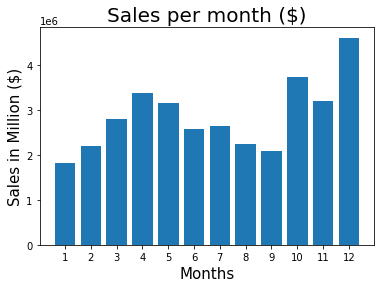

In [81]:
#Making a Bar Graph of Sales vs Months

total = data.groupby('Month').sum()
month = range(1,13)

plt.title('Sales per month ($)', fontdict={'fontsize': 20})
plt.bar(month, total['Total'])
plt.xticks(month)
plt.xlabel('Months', fontdict={'fontsize': 15})
plt.ylabel('Sales in Million ($)', fontdict={'fontsize': 15})
plt.show()


# As we can see in the graph, December had the most sales. The probable cause can be Christmas and New Years

**What US City had highest Number of Sales**

In [87]:
#For this we need a column "city" with City and Sate Information in it

def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(" ")[1]

data['City'] = data['Purchase Address'].apply(lambda x: get_city(x) + "," + get_state(x))
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas,TX"
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston,MA"
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles,CA"
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles,CA"
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles,CA"
...,...,...,...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,"Los Angeles,CA"
186301,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,"San Francisco,CA"
186302,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,"San Francisco,CA"
186303,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,"San Francisco,CA"


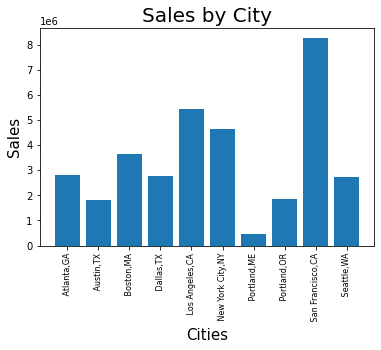

In [92]:
#Graph of Sales vs Cities

cities = [city for city, df in data.groupby('City')]
total = data.groupby('City').sum()

plt.title('Sales by City', fontdict= {'fontsize': 20})
plt.bar(cities, total['Total'])
plt.xticks(cities, rotation='vertical', size=8)
plt.xlabel('Cities', fontdict= {'fontsize': 15})
plt.ylabel('Sales', fontdict= {'fontsize': 15})
plt.show()

This Graph shows that San Francisco,CA had the most sales while Portland,ME had the least.  This can be because this store sells Electronic items and San Francisco being the Tech Hub of the World because of Silicon valley has more Tech Savy people. 

**What time should we display advertisement to maximize the sales**

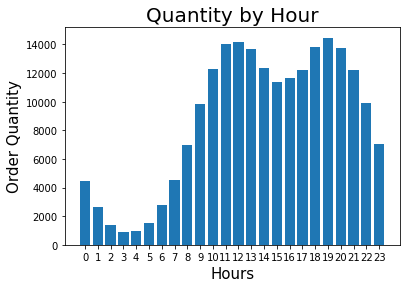

In [141]:
#Order Quantity vs Hours

data['Hour'] = data['Order Date'].dt.hour

quantity_ordered = data.groupby('Hour').sum('')
hours = [hour for hour, df in data.groupby('Hour')]

plt.title('Quantity by Hour', fontdict={'fontsize': 20})
plt.bar(hours, quantity_ordered['Quantity Ordered'])
plt.xticks(hours)
plt.xlabel('Hours', fontdict={'fontsize': 15})
plt.ylabel('Order Quantity', fontdict={'fontsize': 15})
plt.show()

As we can see from this chart, the best time to show advertisment is just before 10, 11 hours  and just before 19 hours.

**What Products are most often sold together?**

In [94]:
#Making a duplicate dataset that groups the product with same Order ID

dup_data = data[data['Order ID'].duplicated(keep=False)]

dup_data['Grouped'] = dup_data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

dup_data = dup_data[['Order ID', 'Grouped']].drop_duplicates()
dup_data

<ipython-input-94-da6e92e39d31>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dup_data['Grouped'] = dup_data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186237,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186239,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186247,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186259,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [95]:
#Spliting the Grouped products

from itertools import combinations
from collections import Counter

count = Counter()

for row in dup_data['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

for key, value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


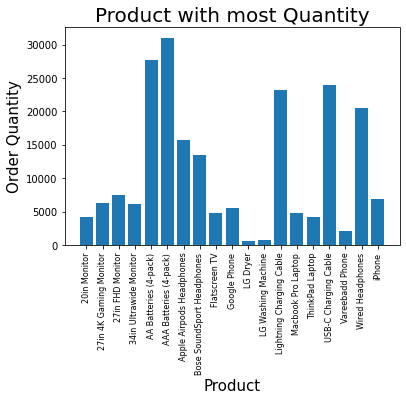

In [97]:
#Product vs Order Quantity Graph

products = [product for product, df in data.groupby('Product')]
quantity = data.groupby('Product').sum()['Quantity Ordered']

plt.title('Product with most Quantity', fontdict={'fontsize': 20})
plt.bar(products, quantity)
plt.xticks(products, rotation='vertical', size = 8)
plt.xlabel('Product', fontdict={'fontsize': 15})
plt.ylabel('Order Quantity', fontdict={'fontsize': 15})
plt.show()

<ipython-input-99-83272d4e4a4e>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


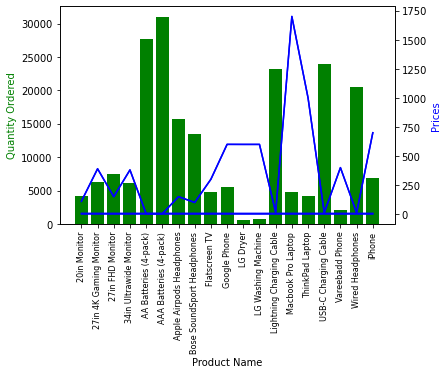

In [99]:
#Comparing product Quantity ordered to Price of the product

prices = data.groupby('Product').mean('Price Each')

fig,ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity, color='g')
ax2.plot(products,prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered',color='g')
ax2.set_ylabel('Prices', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()

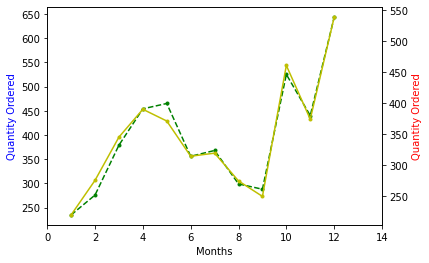

In [138]:
#Ploting the Sales of Macbook Pro and ThinkPad for the year

import matplotlib.ticker as mticker

mac_data = data[data['Product'] == 'Macbook Pro Laptop']
thinkpad_data = data[data['Product'] == 'ThinkPad Laptop']

mac_sales = mac_data.groupby('Month').sum()
thinkpad_sales = thinkpad_data.groupby('Month').sum()
months = [month for month, df in data.groupby('Month')]


fig,ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(months, mac_sales['Quantity Ordered'], 'g.--', )
ax2.plot(months, thinkpad_sales['Quantity Ordered'], 'y.-')

ax1.set_xlabel('Months')
ax1.set_ylabel('Quantity Ordered',color='b')
ax2.set_ylabel('Quantity Ordered', color='r')
ax1.set_xticks(ax1.get_xticks())


plt.show()

This graph shows the relation between the Product Quantity Sale to the Price of the Product. As we can see that lower priced products like **AAA batteries, AA batteries, Lightning Charging Cable** are sold the most while high priced products like **LG dryer and LG washing Machine** have much Lower sales. 

One interesting thing we see is that **Macbook and Thinkpad Laptops** even when had the highest price, were sold more than other higher priced products. The reason for this can be the requirement of Laptops by School and University students. As we can see from the graph above, the most sales for both Macbook and Thinkpad took place in October and December. The cause for the rise of these two Months can be due to Halloween and Christmas/New Years respectively.

**Thank your for viewing this project till the end.**

**Follow me on LinkedIn > https://www.linkedin.com/wokeshubham**

**Follow me on Github > https://www.github.com/wokeshubham**

**Follow me on Twitter > https://www.twitter.com/wokeshubham**